# Presentation

## Run this notebook to create the visuals for the slide deck in Presentation

In [86]:
# Imports
import cabi.viz as v
import cabi.etl.get_data as gd
import cabi.geometry as geo
import requests
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np

## Slide 3, Cabi Stations Mapped on ANC Map

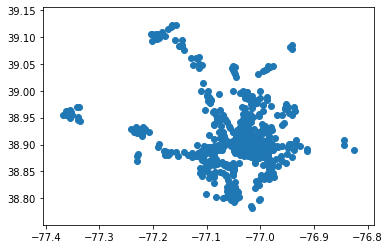

In [2]:
# Load The Stations

curr_station_df = gd.load_station_info()
curr_station_df

coords = geo.point_series(curr_station_df['lon'], curr_station_df['lat'], 'coord_station', curr_station_df['name'])

station_coords = curr_station_df.merge(coords,
                                       on='name')

station_coords = station_coords.drop(\
                                    ['region_id', 'lat', 'lon'], axis = 1)

station_coords = gpd.GeoDataFrame(station_coords, geometry='coord_station')

station_coords.plot()


In [2]:
stations = geo.station_coords()
stations

,name,coord_station
0,Eads St & 15th St S,POINT (-77.05323 38.85897)
1,18th St & S Eads St,POINT (-77.05332 38.85725)
2,Crystal Dr & 20th St S,POINT (-77.04923 38.85643)
3,Crystal Dr & 15th St S,POINT (-77.04959 38.86017)
4,Aurora Hills Cmty Ctr / 18th St & S Hayes St,POINT (-77.05949 38.85787)
...,...,...
597,Eisenhower Ave & Ike Dr,POINT (-77.08246 38.80274)
598,Capitol Ave & Kendall St NE,POINT (-76.98585 38.91099)
599,14th & D St SE,POINT (-76.98639 38.88406)
600,Half & Water St SW,POINT (-77.01055 38.86628)


In [3]:
stations['dc'] = stations.coord_station.map(geo.in_dc)
stations

,name,coord_station,dc
0,Eads St & 15th St S,POINT (-77.05323 38.85897),False
1,18th St & S Eads St,POINT (-77.05332 38.85725),False
2,Crystal Dr & 20th St S,POINT (-77.04923 38.85643),False
3,Crystal Dr & 15th St S,POINT (-77.04959 38.86017),False
4,Aurora Hills Cmty Ctr / 18th St & S Hayes St,POINT (-77.05949 38.85787),False
...,...,...,...
597,Eisenhower Ave & Ike Dr,POINT (-77.08246 38.80274),False
598,Capitol Ave & Kendall St NE,POINT (-76.98585 38.91099),True
599,14th & D St SE,POINT (-76.98639 38.88406),True
600,Half & Water St SW,POINT (-77.01055 38.86628),True


In [25]:
dc_stations = stations[stations['dc']]
dc_stations = dc_stations.set_crs("EPSG:4326")
dc_stations = dc_stations.to_crs(epsg=3857)

In [6]:
gpd.datasets.available

['naturalearth_cities', 'naturalearth_lowres', 'nybb']

In [8]:
import contextily as ctx
from cabi.etl.get_data import anc_gdf

In [9]:
gdf = anc_gdf()

In [21]:
gdf = gdf.set_crs("EPSG:4326")

In [22]:
gdf = gdf.to_crs(epsg=3857)

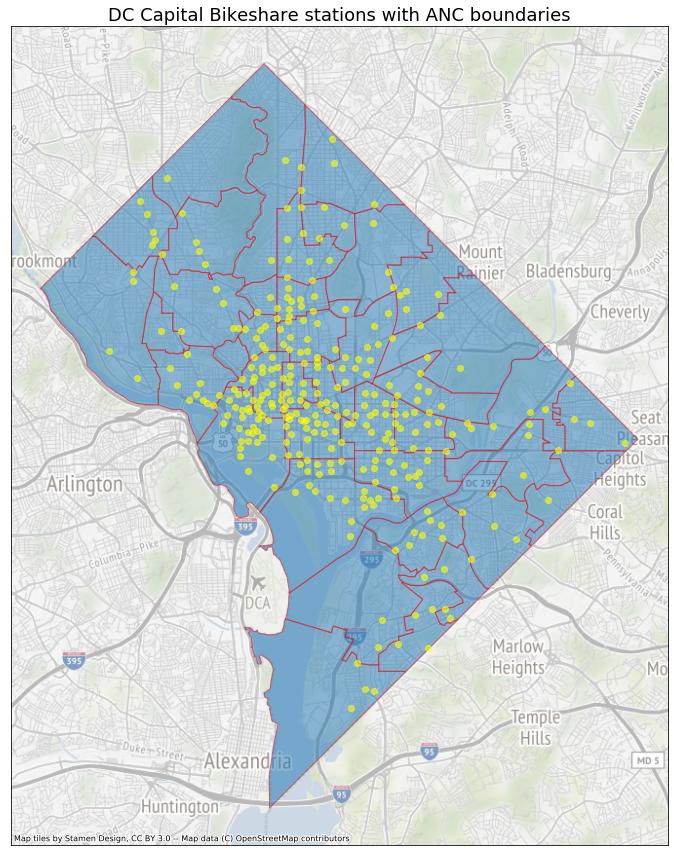

In [143]:
fig, ax = plt.subplots(figsize=(10,12))
gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='red', ax=ax)
ax.set_aspect('equal')
ctx.add_basemap(ax, alpha=0.5)
dc_stations.plot(ax=ax, color='yellow', alpha=0.6)
ax.set_title('DC Capital Bikeshare stations with ANC boundaries', fontsize=18)
fig.savefig('../figures/stationsByANC.png')
ax.set(xticks=[], yticks=[])
fig.tight_layout()
plt.show();

In [61]:
gdf

,geometry,OBJECTID,ANC_ID,WEB_URL,NAME,Shape_Length,Shape_Area
0,"POLYGON ((-8576768.456 4711074.311, -8576783.2...",1,1C,http://anc.dc.gov/page/advisory-neighborhood-c...,ANC 1C,5218.954361,1.285112e+06
1,"POLYGON ((-8575658.524 4712563.172, -8575658.5...",2,1D,http://anc.dc.gov/page/advisory-neighborhood-c...,ANC 1D,4224.010068,9.475922e+05
2,"POLYGON ((-8577662.476 4708395.114, -8577662.6...",3,2A,http://anc.dc.gov/page/advisory-neighborhood-c...,ANC 2A,12477.943204,7.065358e+06
3,"POLYGON ((-8576190.042 4709791.733, -8576190.4...",4,2B,http://anc.dc.gov/page/advisory-neighborhood-c...,ANC 2B,7712.504785,2.160620e+06
4,"POLYGON ((-8574277.993 4707777.552, -8574284.6...",5,2C,http://anc.dc.gov/page/advisory-neighborhood-c...,ANC 2C,7811.084627,2.861750e+06
5,"POLYGON ((-8577106.128 4710217.991, -8577136.5...",6,2D,http://anc.dc.gov/page/advisory-neighborhood-c...,ANC 2D,3789.580516,8.017730e+05
6,"POLYGON ((-8574721.223 4715402.967, -8574722.6...",7,4C,http://anc.dc.gov/page/advisory-neighborhood-c...,ANC 4C,9774.918002,3.139132e+06
7,"POLYGON ((-8579094.146 4710029.660, -8579101.8...",8,2E,http://anc.dc.gov/page/advisory-neighborhood-c...,ANC 2E,10251.428819,4.256525e+06
8,"POLYGON ((-8579580.236 4714628.904, -8579571.5...",9,3E,http://anc.dc.gov/page/advisory-neighborhood-c...,ANC 3E,8690.373128,3.755326e+06
9,"POLYGON ((-8571498.855 4716412.927, -8571498.9...",10,4B,http://anc.dc.gov/page/advisory-neighborhood-c...,ANC 4B,10937.574345,5.035082e+06


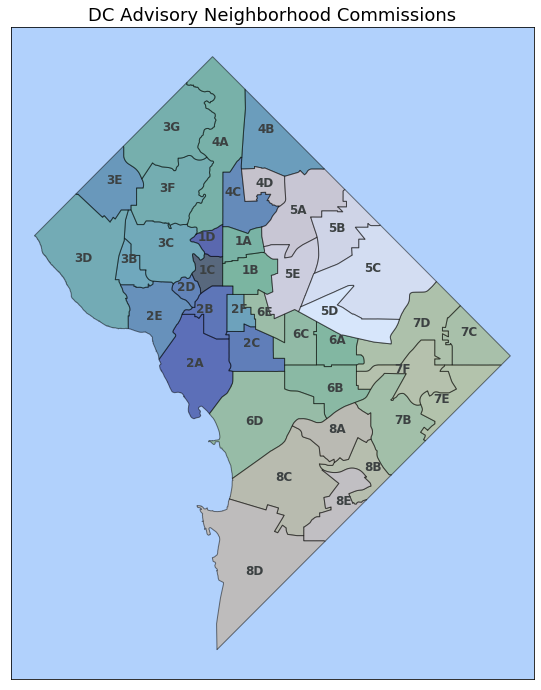

In [140]:
fig, ax = plt.subplots(figsize=(10,12))

ax.set_aspect('equal')
gdf.plot(figsize=(10, 10), alpha=0.5, column='OBJECTID', cmap='gist_earth', edgecolor='k', ax=ax)

gdf['coords'] = gdf['geometry'].apply(lambda x: x.representative_point().coords[:])
gdf['coords'] = [coords[0] for coords in gdf['coords']]

for idx, row in gdf.iterrows():
    plt.annotate(s=row['ANC_ID'], xy=row['coords'],
                 horizontalalignment='center',
                 color='xkcd:charcoal grey',
                 fontsize=12,
                 fontweight='heavy'
                )
ax.set_title('DC Advisory Neighborhood Commissions', fontsize=18)    
ax.set_xticks([])
ax.set_yticks([])
ax.set_facecolor('xkcd:powder blue')
fig.savefig('../figures/DC_ANCs.png')
plt.show();